In [1]:
import os
os.chdir("../../")
from PotentialFlowSolver import *

Libraries fetched!...



In [2]:
kwargs = {"ylim":[-4,4], "V_inf": 10, "g_div": 5, "write":True,
           "n_airfoil": 60,
           "n_fs": 20,
           "n_bed": 20,
           "n_inlet": 10,
           "n_outlet": 10}#, "a":10, "b":1}
model = PotentialFlowSolver("0012" , alpha=10, P=7, kwargs = kwargs)

In [3]:
model.solve()

Starting iteration 0
1.37516331034023
0.3300391944816552
	 dGamma: -4.920133506996128
	 Iteration time: 4.9947052001953125 seconds

Starting iteration 1
1.37516331034023
0.3300391944816552
	 dGamma: 4.0414582970389
	 Iteration time: 2.8223965167999268 seconds

Starting iteration 2
1.37516331034023
0.3300391944816552
	 dGamma: 0.7170823516056339
	 Iteration time: 2.7416255474090576 seconds

Starting iteration 3
1.37516331034023
0.3300391944816552
	 dGamma: 0.13173971955330296
	 Iteration time: 2.81722092628479 seconds

Starting iteration 4
1.37516331034023
0.3300391944816552
	 dGamma: 0.023834011265130507
	 Iteration time: 2.7364392280578613 seconds

Starting iteration 5
1.37516331034023
0.3300391944816552
	 dGamma: 0.004894025463004854
	 Iteration time: 2.7122371196746826 seconds

Starting iteration 6
1.37516331034023
0.3300391944816552
	 dGamma: 0.0009323305105513865
	 Iteration time: 2.751234769821167 seconds

Starting iteration 7
1.37516331034023
0.3300391944816552
	 dGamma: 0.00015

In [4]:
nasa =np.array([[0, -3.66423],
[0.00218341, -5.04375],
[0.00873362, -5.24068],
[0.0131004, -4.67125],
[0.0174672, -4.32079],
[0.0480349, -2.74347],
[0.0742358, -2.26115],
[0.0982533, -1.95405],
[0.124454, -1.7345],
[0.146288, -1.55884],
[0.176856, -1.36109],
[0.28821, -1.00829],
[0.320961, -0.941877],
[0.384279, -0.787206],
[0.447598, -0.654432],
[0.515284, -0.543461],
[0.576419, -0.432633],
[0.637555, -0.343703],
[0.700873, -0.254725],
[0.766376, -0.1657],
[0.831878, -0.098572],
[0.893013, -0.00964205],
[0.958515, 0.0793835],
[1, 0.124088]])


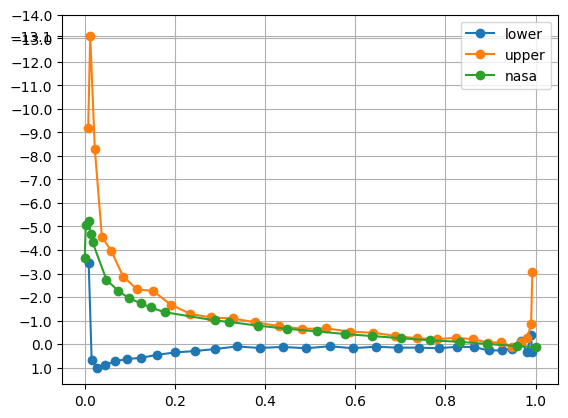

In [5]:
line_clasifier = model.mesh.cell_data_dict["gmsh:physical"]["line"]
naca_points = np.unique(model.mesh.cells_dict["line"][(line_clasifier == 5)])
points = model.mesh.points[naca_points]
pressure = np.array(model.pressure_coeff.at(model.mesh.points[naca_points][:,:2]))
plt.plot(points[:model.kwargs.get("n_airfoil")//2,0][::-1] ,np.flip(pressure[:model.kwargs.get("n_airfoil")//2]), label = "lower", marker = "o", color = "C0")
plt.plot(points[model.kwargs.get("n_airfoil")//2:,0] ,(pressure[model.kwargs.get("n_airfoil")//2:]), label = "upper", marker = "o", color = "C1")
plt.plot(nasa[:,0], nasa[:,1], color = "C2", label = "nasa", marker = 'o')
plt.yticks(np.hstack((np.arange(int(np.min(pressure))-1, 1.1, 1), np.min(pressure))))
plt.legend(loc = "upper right")
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [6]:
coords = np.array([233, 234, 237, 240, 241, 244, 245, 248, 251, 254, 255, 258, 259,
       262, 263, 266, 267, 270, 271, 274, 275, 278, 281, 282, 283, 286,
       287, 290, 291, 294, 295, 296, 299, 300, 303, 304, 305, 306, 307,
       308, 309, 310, 311, 312, 315, 316, 317, 318, 319, 322, 323, 324,
       325, 326, 327, 330, 331, 332, 333, 334])

np.min(model.pressure_coeff.at(model.fd_mesh.coordinates.dat.data_ro[coords]))

np.float64(-0.11669136750756917)

In [7]:
model.fd_mesh.coordinates.dat.data_ro[[331,332]]

array([[ 0.86145459, -0.1397687 ],
       [ 0.9843866 , -0.09937173]])

In [8]:
model.Gamma

np.float64(-5.997635325686861)

In [9]:
model.lift_coeff

np.float64(1.1995270651373722)

In [10]:
model.lift

np.float64(73.47103273966405)

In [11]:
np.min(model.pressure_coeff.dat.data)

np.float64(-13.104600092433381)

In [12]:
-4.251446823121933

-4.251446823121933